In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from time import time
from sklearn.datasets import load_files
from sklearn import metrics
import pandas as pd
import purity

# 預處理

In [3]:
#read files
t = time()
docs = load_files(r'C:\Users\user\mini_newsgroups')

In [ ]:
#純度計算
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features = 2000
from sklearn import preprocessing
vectorizer = TfidfVectorizer(max_df=0.4,min_df=2,max_features=max_features,encoding='latin-1')
X = vectorizer.fit_transform((d for d in docs.data))
CRX=preprocessing.scale(X.data)

# kmeans

In [37]:
start=time()
from sklearn.cluster import KMeans
t = time()
n_clusters = 20
kmean = KMeans(n_clusters=n_clusters, 
               max_iter=100,
               tol=0.01,
               verbose=1,
               n_init=5).fit(X)


Initialization complete
Iteration 0, inertia 3549.647225693213
Iteration 1, inertia 1882.9232252396905
Iteration 2, inertia 1868.3701049685624
Iteration 3, inertia 1861.499177642455
Iteration 4, inertia 1857.0596959395652
Iteration 5, inertia 1855.0559633173093
Iteration 6, inertia 1853.6327767839782
Iteration 7, inertia 1852.4846713200754
Iteration 8, inertia 1851.8400724273997
Iteration 9, inertia 1851.3010484355784
Iteration 10, inertia 1850.7395585370402
Iteration 11, inertia 1849.9964300405989
Iteration 12, inertia 1849.6336367531524
Iteration 13, inertia 1849.3994156688486
Iteration 14, inertia 1849.3274938587458
Iteration 15, inertia 1849.3098727162721
Iteration 16, inertia 1849.2852413863125
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 3521.8682767442992
Iteration 1, inertia 1871.7015561554645
Iteration 2, inertia 1861.8583561475
Iteration 3, inertia 1857.974241978347
Iteration 4, inertia 1855.7577424828282
Iteration 5, inertia 185

In [8]:
k_avg=metrics.silhouette_score(X,kmean.labels_)

In [9]:
KP=purity_score(docs.target,kmean.labels_)
end=time()
kmeant=end-start

# DBSCAN

In [11]:
start =time()
from sklearn.cluster import DBSCAN
    clustering = DBSCAN(eps=1.198,min_samples=5).fit_predict(X)
DP=purity_score(docs.target,clustering)
end=time()
DBSCmeant=end-start
d_avg=metrics.silhouette_score(X,clustering)

In [16]:
X1 = [[i] for i in X.data]

# hierarchy

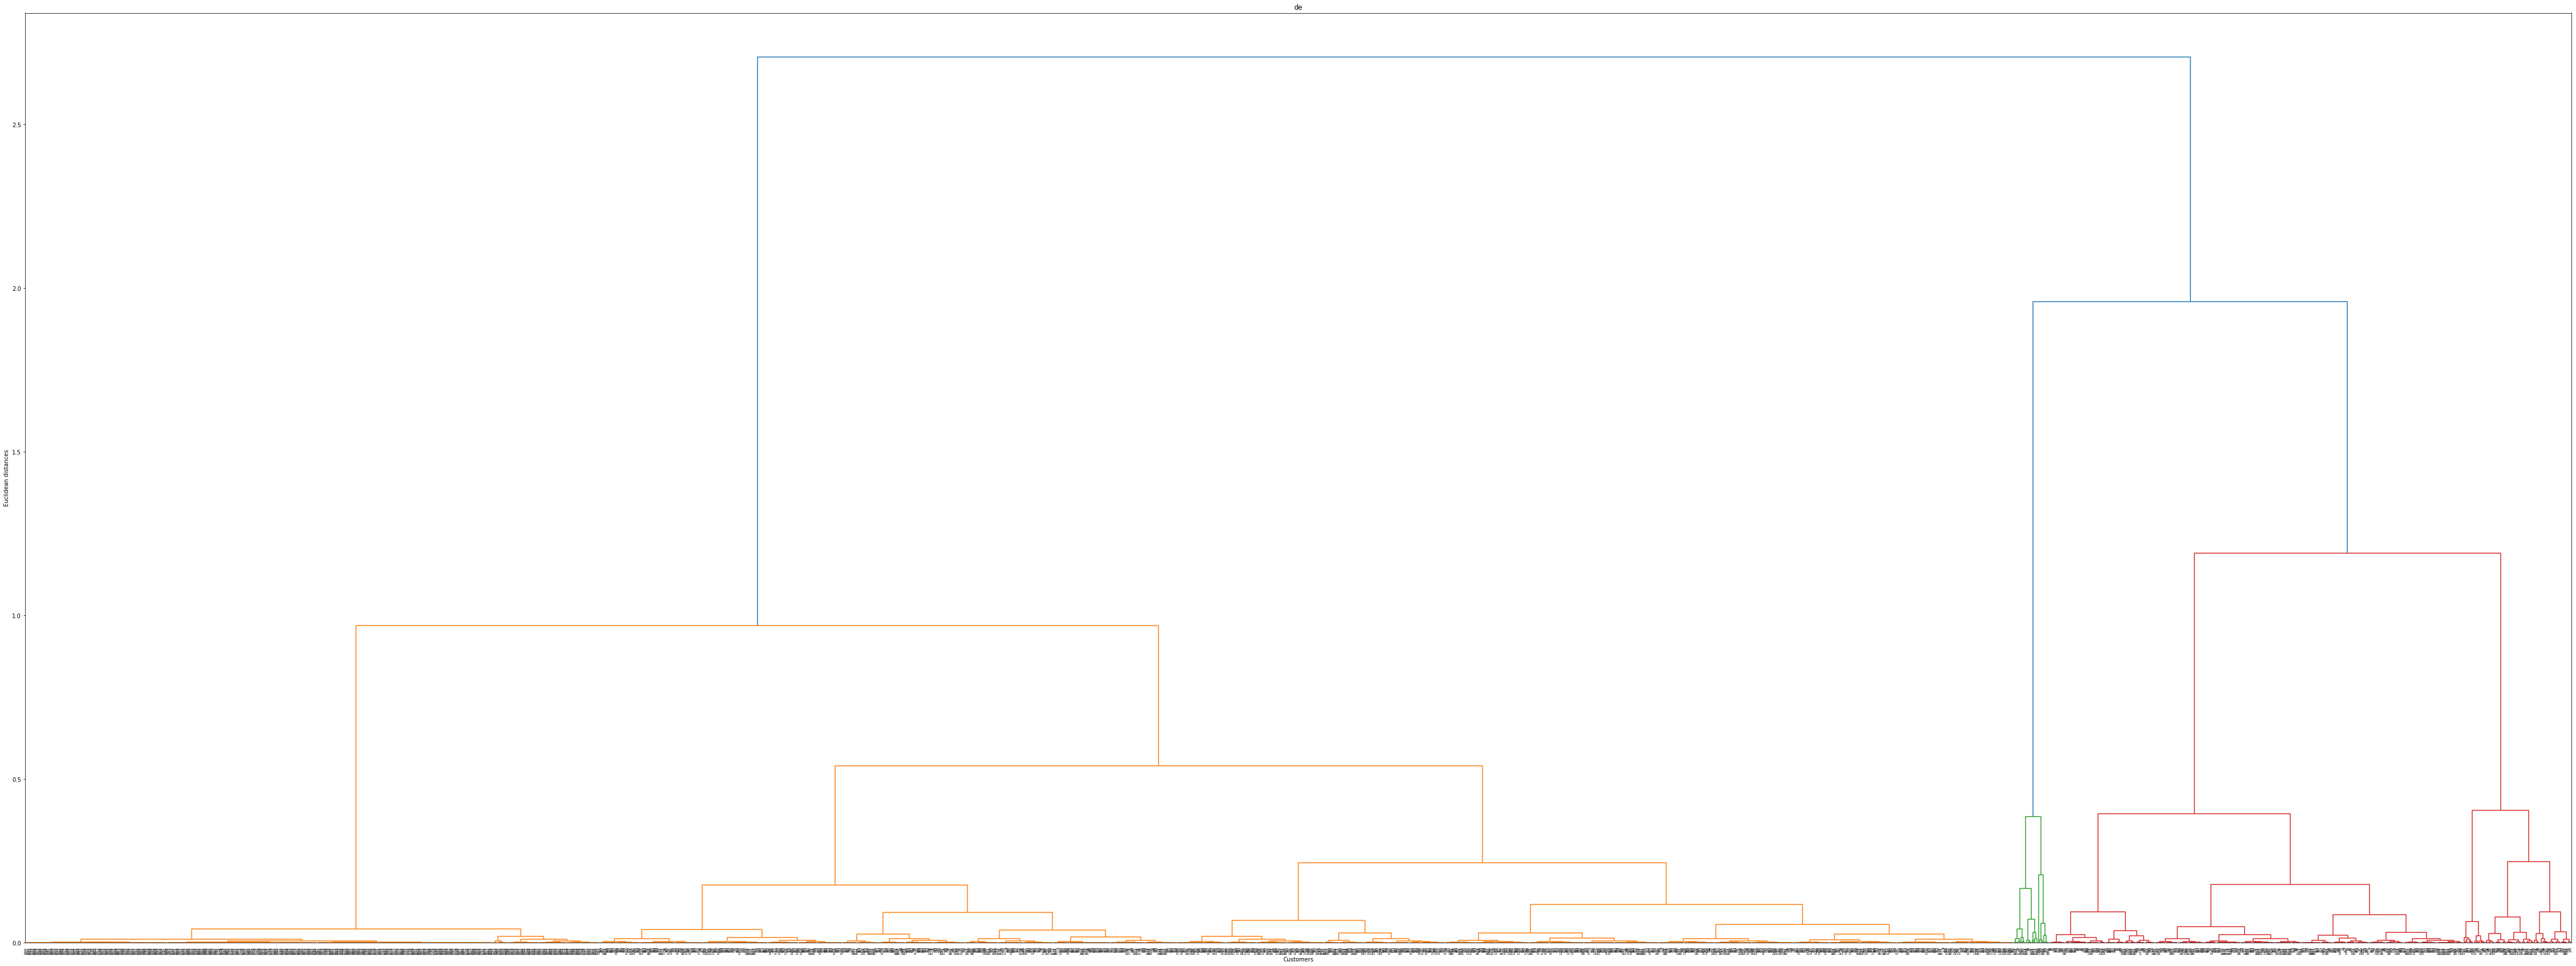

In [35]:
start = time()
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
C2=X1[0:2000]
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(80,30))
den = sch.dendrogram(sch.linkage(C2, method  = "ward"))
plt.title('de')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
xt=X.toarray()
clustering = AgglomerativeClustering(n_clusters=20, affinity='euclidean', d='ward')
clustering=clustering.fit_predict(xt)
HP=purity_score(docs.target,clustering)
h_avg=metrics.silhouette_score(X,clustering)
end=time()
hiermeant=end-start

# cluster Compare

In [25]:
compare = pd.DataFrame()
compare['cluster']=['kmean','DBSCAN','hier']
compare['time']=[kmeant,DBSCmeant,hiermeant]
compare['purity']=[KP,DP,HP]

In [26]:
compare

,cluster,time,purity
0,kmean,4.049592,0.4195
1,DBSCAN,0.232385,0.2190
2,hier,70.164218,0.2515
